## Full working python code for binary merger tree construction
This assumes a standard $\Lambda CDM$ Cosmology

In [93]:
# importing required packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os


In [94]:
# First get sigma as a function of M
# Fourier invert P(k) to get sigma(R) then sigma(M)
# k, P_k = np.loadtxt('data/PCDM_Planck.dat', unpack=True)

In [95]:
# plt.xscale('log')
# plt.yscale('log')
# plt.plot(k, P_k, color='k', ls='--',label='P(k)')
# plt.xlabel('k')
# plt.ylabel('P(k)')
# plt.legend()

In [96]:
def P_k_to_sigma_M(P_k, k):
    """
    Function to convert P(k) to sigma(M)
    Args:
    P_k: Power spectrum P(k)
    k: Wavenumber k
    Returns:
    sigma_M: sigma(M)
    M = 4/3 * pi * R^3 * rho_m
    """
    
    return None

In [97]:
global J_table

#### Physical and Astronomical constants

In [98]:
# Physical and astronomical constants in cgs units

G    = 6.6673e-8 # Gravitational constant
Msun = 1.989e33 # Solar mass
pc   = 3.086e18 # Parsec
mpc  = 1e6 * pc # Megaparsec
yr   = 3.1556926e7 # 1 year in seconds

#### Cosmological Parameters

In [99]:
h = 0.674 # Normalized Hubble constant
H0 = h * 100 * 1e5 / mpc # Hubble constant in cgs units (s^-1)
Omega_M0 = 0.315 # Present Matter density parameter
Omega_Lambda0 = 0.685 # Present Dark Energy density parameter
Omega_B0 = 0.049 # Present Baryon density parameter
delta_crit = 1.686 # Critical linear overdensity for collapse
sigma8_obs = 0.811 # Observed RMS overdensity at R = 8.0/h Mpc 

#### Other Parameters

In [100]:
# Recovery time-scale of gas (to get the threshold halo mass for 
# Pop II star formation)

t_recov = 100e6 * yr # Recovery time-scale of gas in seconds

# Parameters for conditional halo mass function

G0 = 0.57
gamma_1 = 0.38
gamma_2 = - 0.01

# Parameters for choice of redshift step size.

eps_1 = 0.1
eps_2 = 0.1

In [101]:
def sigma_M(M):
    """
    Function to calculate sigma(M), the RMS overdensity, at the present
    redshift z = 0.  
    Args:
    M: Mass M
    Returns:
    sigma(M): RMS overdensity sigma(M)
    """
    M_eq = 2.4e17 * ((Omega_M0*(h**2)/0.14)**(-1/2))
    m = 8*M/M_eq
    N = 0.0845* sigma8_obs
    sigmaM = N * np.sqrt( (36/(1 + 3*m)) - np.log(m/(1 + m))**3)
    return sigmaM

In [102]:
def Delta_vir(z):
    """
    Function to calculate the virial overdensity Delta_vir at redshift z.

    Uses the accurate fit found in Eq. (A23) in:

        M. Tegmark et al. (2006), Dimensionless constants,
        cosmology, and other dark matters, Phys. Rev. D, vol. 73, 2.
    Args:
    z: Redshift z
    Returns:
    Delta_vir: Virial overdensity Delta_vir
    """
    x = (Omega_Lambda0/Omega_M0)*(1/(1 + z)**3)
    Delta_virial = 18*np.pi**2 + 52.8*x**(0.7) + 16*x
    return Delta_virial

In [103]:
def R_vir(M, z):
    """
    Function to calculate the virial radius R_vir of a halo of mass M at redshift z.
    Args:
    M: Mass M
    z: Redshift z
    Returns:
    R_vir: Virial radius R_vir
    """
    H0 = 3.24e-18*h # Hubble constant in s^-1
    rho_M = Omega_M0*((3*H0**2)/(8*np.pi*G))*((1+z)**3) # Mean matter density in g cm^-3
    R_vir = (3*M*Msun/(4*np.pi*Delta_vir(z)*rho_M))**(1/3)
    return R_vir

In [104]:
def v_vir(M, z):
    """
    Function to calculate the virial velocity v_vir of a halo of mass M at redshift z.
    Args:
    M: Mass M
    z: Redshift z
    Returns:
    v_vir: Virial velocity v_vir
    """
    v_virial = ( (G*M*Msun/R_vir(M,z))**0.5 )/1e5
    return v_virial

In [105]:
def alpha_M(M):
    """
    Function to calculate the slope alpha of the power spectrum P(k) at mass M.
    Args:
    M: Mass M
    Returns:
    alpha: Slope alpha
    """
    delta_M = 1e-6*M
    dsigma_dM = (sigma_M(M + delta_M) - sigma_M(M-delta_M))/(2*delta_M)
    alpha = - M/sigma_M(M) * dsigma_dM
    return alpha

In [106]:
# Some quantities derived from the above functions
def alpha_2(M2):
    """
    Function to calculate the slope alpha_2 of the power spectrum P(k) at mass M2.
    Args:
    M: Mass M
    Returns:
    alpha_2: Slope alpha_2
    """
    return alpha_M(M2)

def alpha_h(M2):
    """
    Function to calculate the slope alpha_h of the power spectrum P(k) at mass M2.
    Args:
    M: Mass M
    Returns:
    alpha_h: Slope alpha_h
    """
    return alpha_M(M2/2)

def alpha_1(q, M2):
    """
    Function to calculate the slope alpha_1 of the power spectrum P(k) at mass q*M2.
    Args:
    M: Mass M
    Returns:
    alpha_1: Slope alpha_1
    """
    return alpha_M(q*M2)

def sigma_2(M2):
    """
    Function to calculate sigma_2 at mass M2.
    Args:
    M2: Mass M2
    Returns:
    sigma_2: sigma_2
    """
    return sigma_M(M2)

def sigma_1(q, M2):
    """
    Function to calculate sigma_1 at mass q*M2.
    Args:
    q: Mass ratio q
    M2: Mass M2
    Returns:
    sigma_1: sigma_1
    """
    return sigma_M(q*M2)

def sigma_h(M2):
    """
    Function to calculate sigma_h at mass M2.
    Args:
    M2: Mass M2
    Returns:
    sigma_h: sigma_h
    """
    return sigma_M(M2/2)


In [107]:
def V(q, M2):
    """
    Function to calculate V(q) at mass
    Args:
    q: Mass ratio q
    M2: Mass M2
    Returns:
    V(q): V(q)
    """
    sigma1 = sigma_1(q, M2)
    sigma2 = sigma_2(M2)
    V_val = (sigma1**(2))/(sigma1**(2) - sigma2**(2))**(3/2)
    return V_val

def beta(q_res, M2):
    """ 
    Function to calculate beta at mass q_res*M2
    Args:
    q_res: Mass ratio q_res
    M2: Mass M2
    Returns:
    beta_val: beta
    """
    beta_val = np.log(V(q_res, M2)/V(0.5, M2))/np.log(2*q_res)
    return beta_val

def B(q_res, M2):
    """ 
    Function to calculate B at mass q_res*M2
    Args:
    q_res: Mass ratio q_res
    M2: Mass M2
    Returns:
    B_val: B
    """
    B_val = V(q_res, M2)/(q_res**beta(q_res, M2))
    return B_val

def mu(M2):
    """ 
    Function to calculate mu at mass M2
    Args:
    M2: Mass M2
    Returns:
    mu_val: mu
    """
    mu_val = alpha_h(M2)
    return mu_val

def eta(q_res, M2):
    """
    Function to calculate eta at mass q_res*M2
    Args:
    q_res: Mass ratio q_res
    M2: Mass M2
    Returns:
    eta_val: eta
    """
    eta_val = beta(q_res, M2) - 1 - mu(M2)*gamma_1
    return eta_val

In [108]:
def GrowthFactor(z):
    """
    Function to calculate the growth factor D(z) at redshift z.
    Args:
    z: Redshift z
    Returns:
    D(z): Growth factor D(z)
    """
    # The unnormalized growth factor
    Omega_tot = Omega_Lambda0 + Omega_M0*((1+z)**3)
    Omega_M = Omega_M0*((1+z)**3)/Omega_tot
    Omega_Lambda = Omega_Lambda0/Omega_tot

    FirstFactor = 5*Omega_M/(2*(1+z))
    SecondFactor = Omega_M**(4/7) - Omega_Lambda + (1 + Omega_M/2)*(1 + Omega_Lambda/70)

    GrowthFactor = FirstFactor/SecondFactor

    return GrowthFactor

def D(z):
    """
    Function to calculate the normalized growth factor D(z) at redshift z.
    Args:
    z: Redshift z
    Returns:
    D(z): Normalized growth factor D(z)
    """
    D = GrowthFactor(z)/GrowthFactor(0)
    return D

def delta(z):
    """
    Function to calculate the critical linear overdensity delta at redshift z.
    Args:
    z: Redshift z
    Returns:
    delta: critcal Linear overdensity delta
    """
    delta = delta_crit/D(z)
    return delta

def ddeldz(z):
    """
    Function to calculate d delta/dz at redshift z.
    Args:
    z: Redshift z
    Returns:
    ddeldz: d delta/dz
    """
    # step size for numerical differentiation
    deltaz = 1e-5
    # The derivative of delta with respect to z, central difference
    ddeldz = (delta(z + deltaz) - delta(z - deltaz))/(2*deltaz)

    return ddeldz



In [109]:
def S(q, z, M2, q_res):
    """
    Function to calculate S(q) at redshift z for mass M2.
    Args:
    q: Mass ratio q
    z: Redshift z
    M2: Mass M2
    q_res: Resolution of q
    Returns:
    S(q): S(q)
    """
    F1 = q**(eta(q_res, M2) - 1)
    F2 = (delta(z)/sigma_2(M2))**gamma_2
    F3 = (sigma_h(M2)/sigma_2(M2))**gamma_1
    #print(F1, F2, F3)
    #print(B(q_res, M2))
    #print(alpha_h(M2))
    #print(G0)
    #print(2**(mu(M2)*gamma_1))
    #print(ddeldz(z))
    S_val = np.sqrt(2/np.pi)*B(q_res, M2)*alpha_h(M2)*F1*(G0/(2**(mu(M2)*gamma_1)))*F2*F3*ddeldz(z)

    return S_val

def R(q, M2, q_res):

    """
    Function to calculate R(q) 
    Args:
    q: Mass ratio q
    M2: Mass M2
    q_res: Resolution of q
    Returns:
    R(q): R(q) 
    """
    R = (alpha_1(q, M2)/alpha_h(M2))*(V(q, M2)/(B(q_res, M2)*q**beta(q_res, M2)))*((2*q)**mu(M2)*sigma_1(q, M2)/sigma_h(M2))**gamma_1

    return R

def step_z(z, M2, q_res):
    """
    Function to calculate the step size for redshift z.
    Args:
    z: Redshift z
    M2: Mass M2
    q_res: Resolution of q
    Returns:
    step_z: step size for redshift z
    """
    Integral = (S(1, z, M2, q_res)/eta(q_res, M2)) * (0.5**(eta(q_res, M2)) - q_res**(eta(q_res, M2)))

    dz = np.sqrt(2)* np.sqrt( sigma_h(M2)**2 - sigma_2(M2)**2 )/ddeldz(z)

    #print("dz: ", dz)
    #print("eps2/abs(Integral): ", eps_2/np.abs(Integral))

    stepsize_z = min(eps_1*dz, eps_2/np.abs(Integral))

    return stepsize_z

def N_upper(z, M2, q_res):
    """
    Function to calculate the upper limit for the redshift z.
    Args:
    z: Redshift z
    M2: Mass M2
    q_res: Resolution of q
    Returns:
    N_upper: Upper limit for redshift z
    """

    N_upper = (S(1,z,M2,q_res)/eta(q_res,M2))*(
               0.5**eta(q_res,M2) - q_res**eta(q_res,M2) )*step_z(z,M2,q_res)
    return N_upper

def J_exact(u_res):
    """
    Function to calculate the exact value of the integral J(u_res).
    Args:
    u_res: Resolution of u
    Returns:
    J_exact: Exact value of the integral J(u_res)
    """
    Integrand  = lambda u: (1 + 1/u**2)**(gamma_1/2)

    Integral = sp.integrate.quad(Integrand, 0, u_res)[0]
    # This is a long integral, and the algorithm can be sped up
    return Integral

def Interpolated_J():
    """
    Function to calculate the interpolated value of the integral J(u_res).
    Args:
    Returns:
    J_interp: Interpolated value of the integral J(u_res)
    """
    global J_table
    print("")
    print(" C R E A T I N G   I N T E R P O L A T I O N   F U N C T I O N ...")
    print("")

    x = np.linspace(1e-5, 300, 600)
    data = np.array([J_exact(u) for u in x])
    J = sp.interpolate.interp1d(x, data, kind='cubic')
    J_table = J

    print("D O N E !")
    print("")

def F(z, M2, q_res):
    """
    Function to calculate the function F(z) at redshift z.
    Args:
    z: Redshift z
    M2: Mass M2
    q_res: Resolution of q
    Returns:
    F(z): Function F(z)
    """
    #global J_table
    M_res = q_res*M2
    sigma_res = sigma_M(M_res)
    u_res = sigma_2(M2)/np.sqrt( sigma_res**2 - sigma_2(M2)**2 )
    delta2 = delta(z)
   

    F = np.sqrt(2/np.pi)*J_exact(u_res)*(G0/sigma_2(M2))*((delta2/sigma_2(M2))**gamma_2)*ddeldz(z)*step_z(z,M2,q_res)
    return F



def M_main(M0, z0, z_max, M_res, DataFileName1, DataFileName2, print_info= True, save= True):
    """
    The algorithm to find the evolution of the
        main progenitor, given that it has a mass M0
        at redshift z0. The main branch is followed
        back to a maximum redshift z_max.

        RETURNS: M_main, z_main, v_vir, M_sub, z_sub

        where M_main[i] is the mass of the main branch
        at redshift z_main[i], and v_vir[i] is the corresponding
        virial velocity at that redshift. Furthermore,
        M_sub[i] is the mass of an accreted subhalo at redshift
        z_sub[i].

        Furthermore, the data is saved in data files with names
        DataFile1 and DataFile2 containing the
        following data:

        DataFileName1: M_main, z_main, v_vir
        DataFileName2: M_sub,  z_sub
    """
    # Initializing the required arrays
    #print(M0, " ",z0)
    #print(v_vir(M0, z0))
    M_main = np.array([M0], dtype=np.float64)
    z_main = np.array([z0], dtype=np.float64)
    V_vir = np.array([v_vir(M0, z0)], dtype=np.float64)
    M_sub = np.array([], dtype=np.float64)
    z_sub = np.array([], dtype=np.float64)

    ###############################################################
    #######                                                 #######
    #######               A L G O R I T H M                 #######
    #######                                                 #######
    ###############################################################

    if print_info:
        print(" S T A R T I N G   A L G O R I T H M ...")
        print("")
        print(" M A S S   R E S O L U T I O N : ", M_res)
        print(f" Main progenitor mass at z = {z0} : {M0:.2e} Msun")
        print("")

    
    try:
        while z_main[-1] < z_max and M_main[-1] > 2*M_res:
        # set the mass of the main progenitor
            M2 = M_main[-1]

            if print_info:
                print(f" Main progenitor mass at z = {z_main[-1]:.2f} : {M2:.2e} Msun")
                print("")

            q_res = M_res/M2 # mass ratio resolution

            # Drawing random numbers for the branching decisions
            r1 = np.random.rand()
            #print("r1: ", r1)
            #print("z_main[-1]: ", z_main[-1])
            #print("M2: ", M2)
            #print("q_res: ", q_res)
            #print("N_upper: ", N_upper(z_main[-1], M2, q_res))
            #break
            if r1 > N_upper(z_main[-1], M2, q_res):
                # The main progenitor does not branch
                # The halo mass is reduced to M2(1-F)
                #print("No branching")
                M_new = M2*(1 - F(z_main[-1], M2, q_res))
                # Append the new mass to the M_main array, next redshifts
                # and also the virial velocity
                M_main = np.append(M_main, M_new)
                z_new = z_main[-1] + step_z(z_main[-1], M2, q_res)
                z_main = np.append(z_main, z_new)
                V_vir = np.append(V_vir, v_vir(M_new, z_new))

            else:
                # In this case we generate a second random variable.
                print("Branching decision: yes")
                r2 = np.random.rand()

                # This is transformed to get a value for q:

                q = (q_res**eta(q_res, M2) + (2**(-eta(q_res, M2)) - q_res**eta(q_res, M2))*r2 )**(1/eta(q_res, M2))

                # The third random number generator

                r3 = np.random.rand()

                if r3 < R(q, M2, q_res):
                    # In this case we get two progenitors of mass q*M2 and M2*(1 - F - q)
                    print("Two progenitors")
                    Mdraw1 = M2*q
                    Mdraw2 = M2*(1 - F(z_main[-1], M2, q_res) - q)

                    # The larger of the two masses is appended to the M_main array (next main progenitor)
                    # and the smaller mass is appended to the M_sub array (subhalo progenitor)

                    Mlarger = max(Mdraw1, Mdraw2)
                    Msmaller = min(Mdraw1, Mdraw2)

                    M_main = np.append(M_main, Mlarger)
                    M_sub = np.append(M_sub, Msmaller)

                    # Calculating and saving the needed redshifts:

                    z_sub = np.append(z_sub, z_main[-1])
                    z_new = z_main[-1] + step_z(z_main[-1], M2, q_res)
                    z_main = np.append(z_main, z_new)

                    # Also saving the virial velocity of at z_new

                    V_vir = np.append(V_vir, v_vir(Mlarger, z_new))

                else:
                    # In the case where the branching is not accepted, the mass of the main
                    # progenitor is reduced to M2*(1 - F)
                    print("No branching")
                    M_new = M2*(1 - F(z_main[-1], M2, q_res))

                    # Appending the new mass to the M_main array, next redshifts
                    # and also the virial velocity

                    M_main = np.append(M_main, M_new)

                    z_new = z_main[-1] + step_z(z_main[-1], M2, q_res)

                    z_main = np.append(z_main, z_new)

                    V_vir = np.append(V_vir, v_vir(M_new, z_new))

    except KeyboardInterrupt:
        Redshift = z_main
        Mass = M_main
        plt.plot(Redshift, Mass, 'x-', label='M = 1e13')
        plt.yscale('log')

        plt.xlabel('Redshift')
        plt.ylabel('Mass')
        plt.legend()

    if print_info:
        print("D O N E !")
        print("")
    
    if save:
        # Saving the data in files. The files are saved in the same directory as the script

        current_dir = os.getcwd()

        FilePath1 = os.path.join(current_dir, DataFileName1)
        FilePath2 = os.path.join(current_dir, DataFileName2)

        np.savetxt(FilePath1, np.c_[M_main, z_main, V_vir], header="M_main, z_main, v_vir")
        np.savetxt(FilePath2, np.c_[M_sub, z_sub], header="M_sub, z_sub")

    return M_main, z_main, V_vir, M_sub, z_sub


        


In [110]:
z0         = 0.0
M0         = 1e13
z_max      = 30.0
M_res      = 1e10
HostMassRedshiftVvir   = "HostMassRedshiftVvir_13.txt"
SubMassSubRedshift     = "SubMassSubRedshift_M013.txt"

M_main(M0, z0, z_max, M_res, HostMassRedshiftVvir, SubMassSubRedshift, print_info= True, save= True)

 S T A R T I N G   A L G O R I T H M ...

 M A S S   R E S O L U T I O N :  100000000.0
 Main progenitor mass at z = 0.0 : 1.00e+13 Msun

 Main progenitor mass at z = 0.00 : 1.00e+13 Msun

 Main progenitor mass at z = 0.00 : 1.00e+13 Msun

 Main progenitor mass at z = 0.00 : 1.00e+13 Msun

 Main progenitor mass at z = 0.00 : 1.00e+13 Msun

 Main progenitor mass at z = 0.00 : 1.00e+13 Msun

 Main progenitor mass at z = 0.00 : 1.00e+13 Msun

 Main progenitor mass at z = 0.00 : 1.00e+13 Msun

 Main progenitor mass at z = 0.00 : 1.00e+13 Msun

 Main progenitor mass at z = 0.00 : 1.00e+13 Msun

Branching decision: yes
Two progenitors
 Main progenitor mass at z = 0.00 : 1.00e+13 Msun

 Main progenitor mass at z = 0.00 : 1.00e+13 Msun

 Main progenitor mass at z = 0.00 : 1.00e+13 Msun

 Main progenitor mass at z = 0.00 : 1.00e+13 Msun

 Main progenitor mass at z = 0.00 : 1.00e+13 Msun

Branching decision: yes
Two progenitors
 Main progenitor mass at z = 0.00 : 1.00e+13 Msun

 Main progenitor 

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

Branching decision: yes
No branching
 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

Branching decision: yes
Two progenitors
 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main progenitor mass at z = 0.02 : 9.96e+12 Msun

 Main

(array([1.00000000e+13, 9.99994596e+12, 9.99989192e+12, ...,
        2.26880444e+08, 2.09896831e+08, 1.93525884e+08]),
 array([0.00000000e+00, 2.98076712e-05, 5.96147871e-05, ...,
        1.47415858e+01, 1.49421292e+01, 1.51434906e+01]),
 array([271.52612299, 271.52836737, 271.53061169, ...,  27.9026648 ,
         27.36073544,  26.79752722]),
 array([1.12562435e+08, 1.73795833e+08, 2.17125131e+08, ...,
        8.35357850e+08, 6.00206252e+08, 3.07353470e+08]),
 array([2.38445824e-04, 3.87457971e-04, 1.16211482e-03, ...,
        1.02630143e+01, 1.14878769e+01, 1.16905092e+01]))

In [111]:
Mass, Redshift, v_virial = np.loadtxt("HostMassRedshiftVvir_13.txt", unpack=True, usecols=(0,1,2))

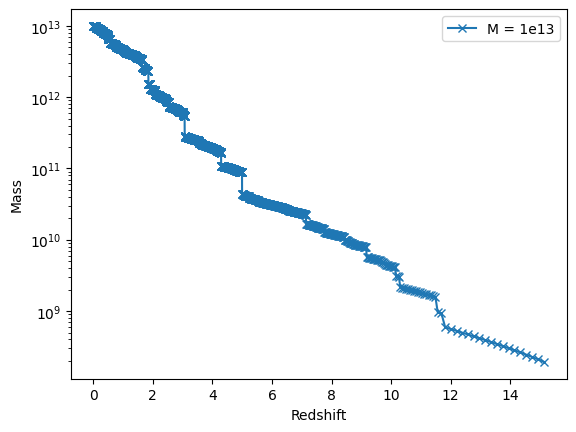

In [112]:
plt.plot(Redshift, Mass, 'x-', label='M = 1e13')
plt.yscale('log')

plt.xlabel('Redshift')
plt.ylabel('Mass')
plt.legend()


/tmp/ipykernel_13755/2930434059.py:3: RuntimeWarning: overflow encountered in power
  plt.plot(M_arr, sigma_M(10**(M_arr)))
/tmp/ipykernel_13755/2552300181.py:13: RuntimeWarning: invalid value encountered in divide
  sigmaM = N * np.sqrt( (36/(1 + 3*m)) - np.log(m/(1 + m))**3)


Text(0, 0.5, '$\\sigma (M)$')

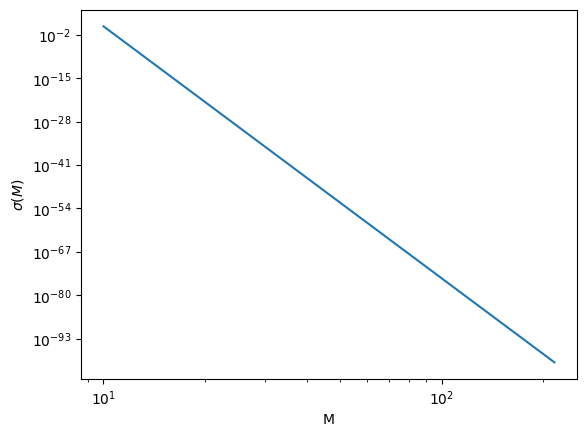

In [114]:
M_arr = np.logspace(np.log10(1e1), np.log10(1e13), 10)
#plt.plot(M_arr)
plt.plot(M_arr, sigma_M(10**(M_arr)))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M')
plt.ylabel(r'$\sigma (M)$')

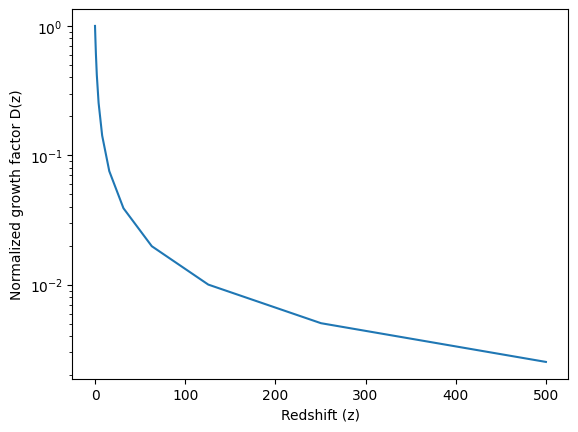

In [115]:
z_arr = np.logspace(-3, np.log10(500), 20)
plt.plot(z_arr, D(z_arr))
plt.xlabel("Redshift (z)")
plt.ylabel("Normalized growth factor D(z)")
plt.yscale('log')
#plt.xscale('log')
